In [43]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [44]:
%cd /home/kenji/Projects/BasicProjects/LinReg_StudentSuccess

/home/kenji/Projects/BasicProjects/LinReg_StudentSuccess


In [45]:
## 1. Data
### 1.1 Load Data
data = pd.read_csv('Data/student-mat.csv',sep=';')

In [46]:
### 1.2 EDA: Initial Data Inspection
#### 1.2.1 Examine Dataset
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [47]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [48]:
data.shape

(395, 33)

In [49]:
#### 1.2.2 Examine & Modify Dataset Columns
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [50]:
data.columns = map(str.lower, data.columns)

In [51]:
##### 1.2.2.1 Missing Values?
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
dtype: int64

In [52]:
### 1.3 EDA: Initial Statistics
data.describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [53]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
pstatus        2
medu           5
fedu           5
mjob           5
fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
dalc           5
walc           5
health         5
absences      34
g1            17
g2            17
g3            18
dtype: int64

In [54]:
for i in data.columns:
    print('\n',i)
    print(f'min: {min(data[i].value_counts())} max: {max(data[i].value_counts())}')
    print(data[i].value_counts()[:5],'\n')
    


 school
min: 46 max: 349
GP    349
MS     46
Name: school, dtype: int64 


 sex
min: 187 max: 208
F    208
M    187
Name: sex, dtype: int64 


 age
min: 1 max: 104
16    104
17     98
18     82
15     82
19     24
Name: age, dtype: int64 


 address
min: 88 max: 307
U    307
R     88
Name: address, dtype: int64 


 famsize
min: 114 max: 281
GT3    281
LE3    114
Name: famsize, dtype: int64 


 pstatus
min: 41 max: 354
T    354
A     41
Name: pstatus, dtype: int64 


 medu
min: 3 max: 131
4    131
2    103
3     99
1     59
0      3
Name: medu, dtype: int64 


 fedu
min: 2 max: 115
2    115
3    100
4     96
1     82
0      2
Name: fedu, dtype: int64 


 mjob
min: 34 max: 141
other       141
services    103
at_home      59
teacher      58
health       34
Name: mjob, dtype: int64 


 fjob
min: 18 max: 217
other       217
services    111
teacher      29
at_home      20
health       18
Name: fjob, dtype: int64 


 reason
min: 36 max: 145
course        145
home          109
reputation    1

In [55]:
### 1.4 EDA: Initial Visualization

data.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

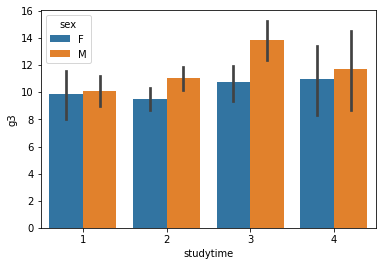

In [56]:
sns.barplot(data=data, x=data.studytime, y="g3", hue='sex')
plt.show()

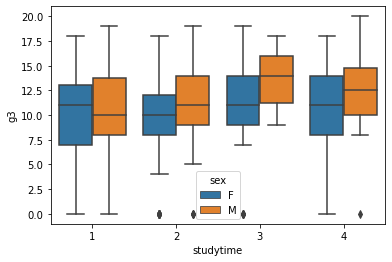

In [57]:
sns.boxplot(data=data, x=data.studytime, y="g3", hue='sex')
plt.show()

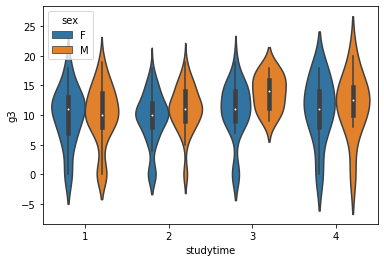

In [58]:
sns.violinplot(data=data, x=data.studytime, y="g3", hue='sex')
plt.show()

In [59]:
## 2. Preprocessing
### 2.1 Diagnose Dataset
# There's nothing missing
import plotly.express as px
 
# load in iris data
df = data
 
# create 3D scatter plot
fig = px.scatter_3d(df, x='g1', y='g2', z='g3', color='absences')
fig.show()

In [60]:

 
# create 3D scatter plot
fig = px.scatter_3d(df, x='g1', y='g2', z='g3', color='studytime')
fig.show()

In [61]:
data.studytime.isna().sum()

0

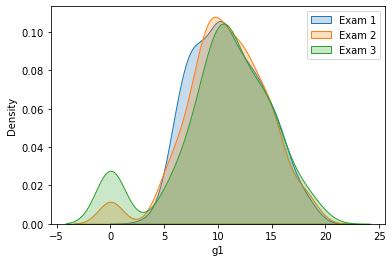

In [62]:
sns.kdeplot(data.g1, shade=True, label="Exam 1")
sns.kdeplot(data.g2, shade=True, label="Exam 2")
sns.kdeplot(data.g3, shade=True, label="Exam 3")

plt.legend()
plt.show()

In [63]:
#sns.pairplot(data, hue="studytime", diag_kind="hist")

In [64]:
## 2.2 Data Wrangling
### 2.2.1 Missing Data? 
def missing_data():
    for i in data.columns:
        if data[i].isnull().sum() > 0:
            print(i)
            print(data[i].isnull().sum())
        else:
            return 'Nothing Missing'
print(missing_data())

Nothing Missing


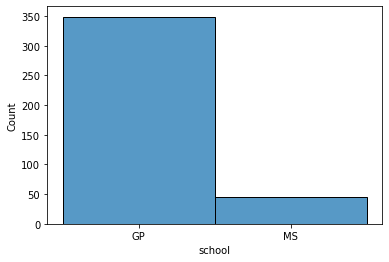

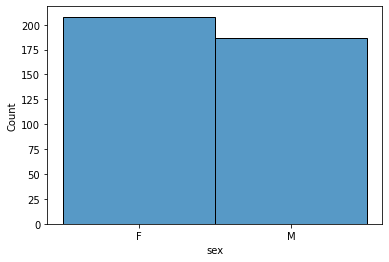

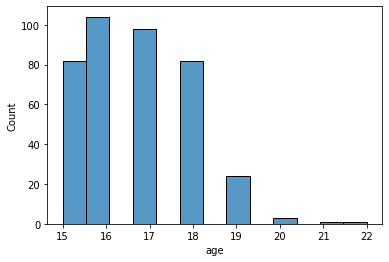

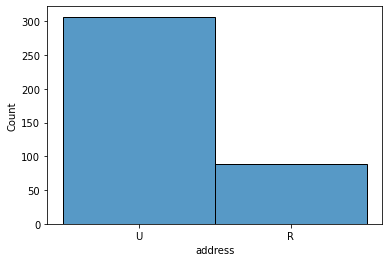

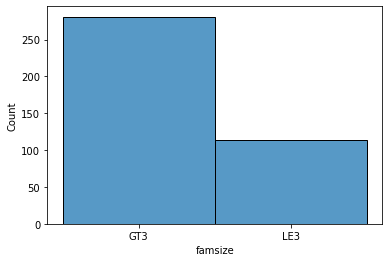

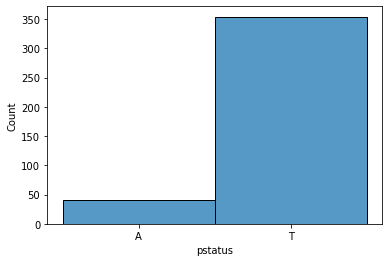

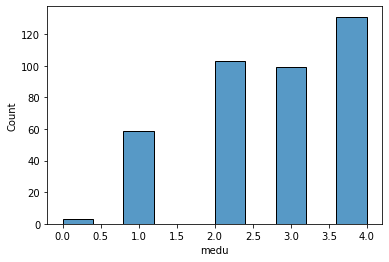

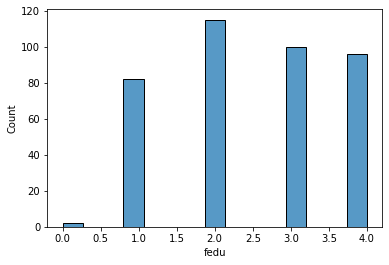

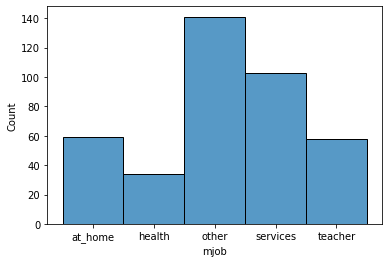

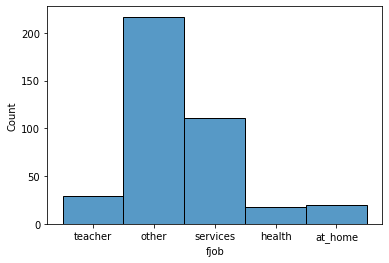

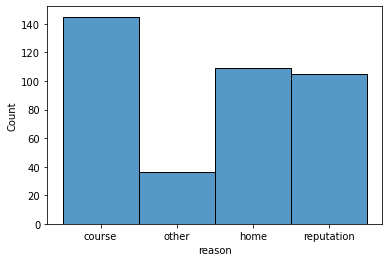

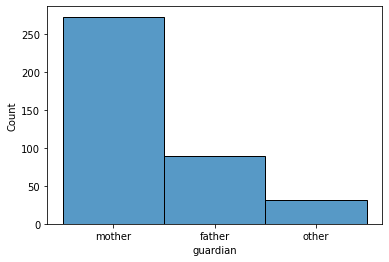

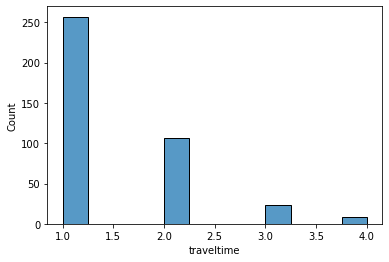

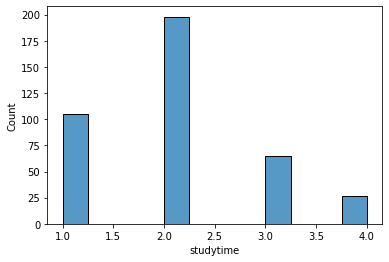

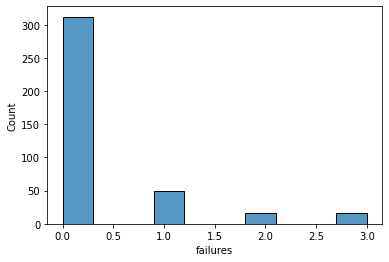

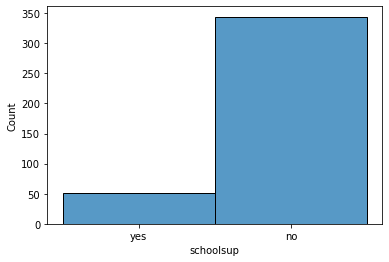

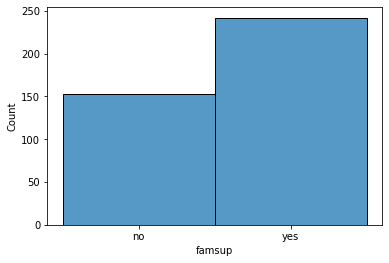

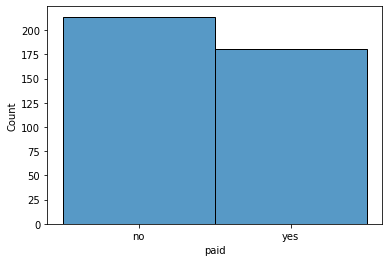

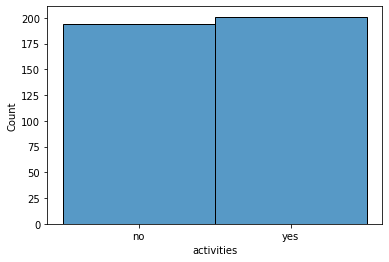

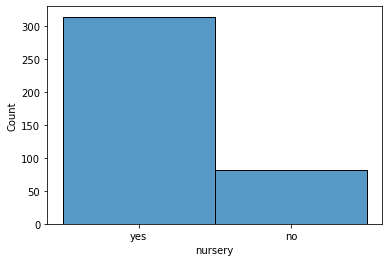

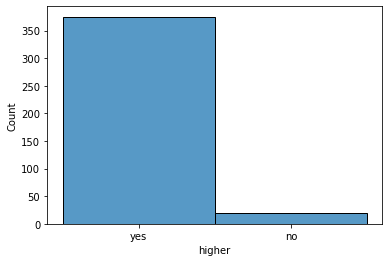

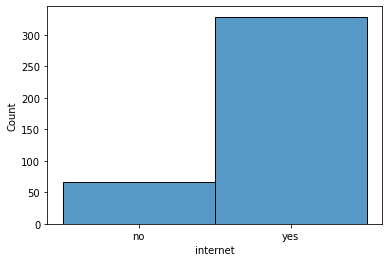

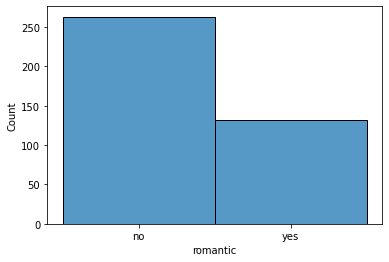

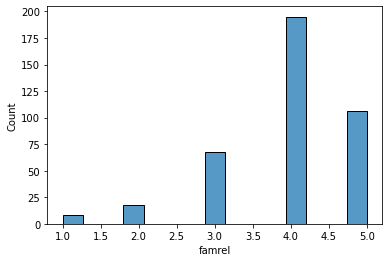

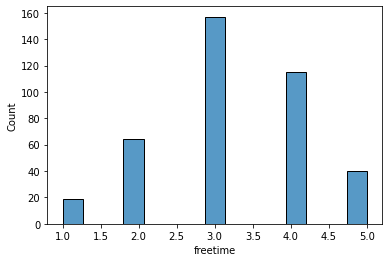

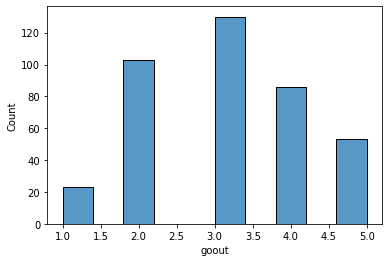

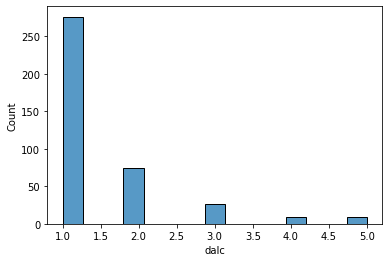

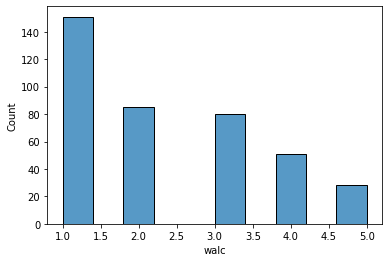

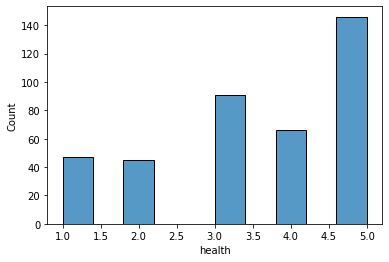

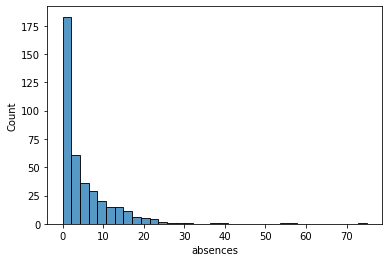

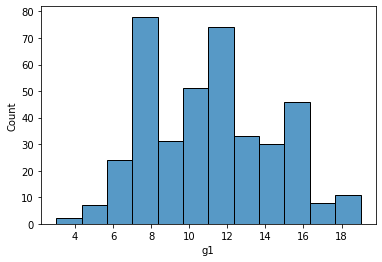

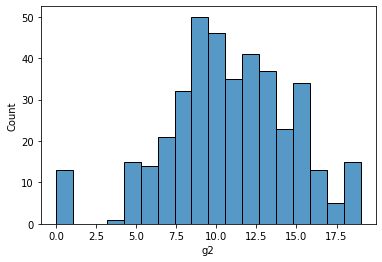

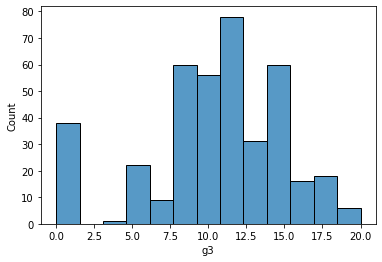

In [65]:
for i in data.columns:
    ax = sns.histplot(data, x =i)
    plt.show()

In [66]:
#Initial Summary Statistics
print(data.describe())

              age        medu        fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        dalc        walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [67]:
#EDA: Feature Importance/Selection
# Convariance: Strength of Linear relationships

In [68]:
target = 'g3'
quants = [x for x in data.select_dtypes(np.number).columns]
print(quants)

['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3']


In [69]:
#TODO turn this into a helper function. Compares covariances and returns strongest independent variables.
def find_associations(data):
    associated = []
    for i in data.select_dtypes(np.number).columns:
        if i == target:
            continue
        pearson_cor, pval = pearsonr(data[i],data[target])

        if pearson_cor > .3:
            associated.append([i,pearson_cor])
    return associated
    

In [70]:

y_data = data[target]
data = data[[i[0] for i in find_associations(data)]]
data[target] = y_data

data

<ipython-input-70-cac36c07c193>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,g1,g2,g3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10
...,...,...,...
390,9,9,9
391,14,16,16
392,10,8,7
393,11,12,10


In [71]:
data

,g1,g2,g3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10
...,...,...,...
390,9,9,9
391,14,16,16
392,10,8,7
393,11,12,10


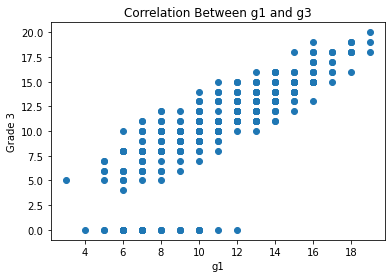

The Pearson Correlation (-1 to +1) is 0.8014679320174141


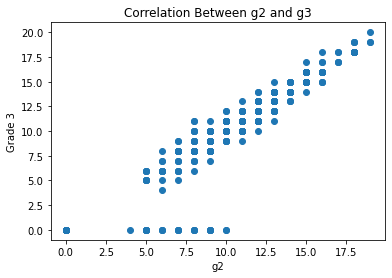

The Pearson Correlation (-1 to +1) is 0.9048679892693011


In [72]:
for col in data.columns:
    if col == target:
        continue
    plt.scatter(data[col],data[target])
    plt.xlabel(str(col))
    plt.ylabel('Grade 3')
    plt.title(f'Correlation Between {col} and {target}')
    plt.show()
    pearson_cor, pval = pearsonr(data[col],data[target])
    print(f'The Pearson Correlation (-1 to +1) is {pearson_cor}')

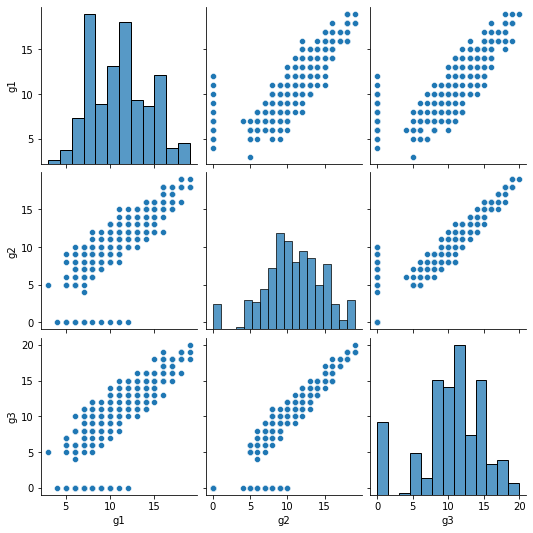

In [73]:
sns.pairplot(data)
plt.show()

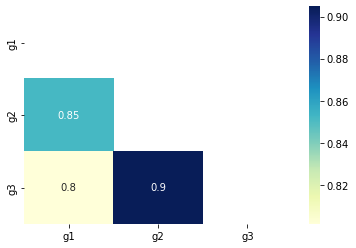

In [74]:
#data = data[['G1','G2','G3','studytime','failures','absences']]
mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True


sns.axes_style("white")
dataplot = sns.heatmap(data.corr(method='pearson'), cmap="YlGnBu", mask=mask,annot=True)
plt.show()

In [75]:
#Process Data

In [76]:
#Split Data
x = np.array(data.drop([target],axis=1))
y = np.array(data[target])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [77]:
#Fit/Train Model
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [78]:
#Evaluate Model
print(linreg.score(x_test,y_test))
print(linreg.coef_)
y_pred = linreg.predict(x_test)
#print(f'The Intercept (grade) is {linreg.intercept_}')
for i in range(len(y_pred)):
    print(f'Predicted: {round(y_pred[i])}\t Actual: {y_test[i]} \t Data {x_test[i]}')

0.664677115675403
[0.14748552 0.98191713]
Predicted: 4.0	 Actual: 0 	 Data [6 5]
Predicted: 8.0	 Actual: 8 	 Data [9 8]
Predicted: 10.0	 Actual: 11 	 Data [10 10]
Predicted: 11.0	 Actual: 11 	 Data [11 11]
Predicted: 12.0	 Actual: 12 	 Data [15 12]
Predicted: 13.0	 Actual: 14 	 Data [10 13]
Predicted: 9.0	 Actual: 0 	 Data [9 9]
Predicted: 10.0	 Actual: 11 	 Data [10 10]
Predicted: 6.0	 Actual: 8 	 Data [6 7]
Predicted: 11.0	 Actual: 10 	 Data [10 11]
Predicted: 16.0	 Actual: 15 	 Data [15 16]
Predicted: 9.0	 Actual: 9 	 Data [11  9]
Predicted: 9.0	 Actual: 9 	 Data [9 9]
Predicted: 13.0	 Actual: 14 	 Data [14 13]
Predicted: 10.0	 Actual: 10 	 Data [10 10]
Predicted: 9.0	 Actual: 9 	 Data [9 9]
Predicted: 15.0	 Actual: 14 	 Data [15 15]
Predicted: -1.0	 Actual: 0 	 Data [6 0]
Predicted: 12.0	 Actual: 11 	 Data [11 12]
Predicted: 14.0	 Actual: 14 	 Data [12 14]
Predicted: 10.0	 Actual: 10 	 Data [11 10]
Predicted: 10.0	 Actual: 10 	 Data [10 10]
Predicted: 11.0	 Actual: 12 	 Data [12 11

In [79]:
#Tune Model

In [80]:
accuracy = linreg.score(x_test,y_test)

In [81]:
coefficients = linreg.coef_

In [82]:
y_int = linreg.intercept_

In [83]:
print(accuracy)
print(coefficients)
print(y_int)

0.664677115675403
[0.14748552 0.98191713]
-1.6430330166120886


In [84]:
for coef, var in zip(coefficients,data.drop(target,axis=1).columns):
    print(var,coef)

g1 0.14748552160785333
g2 0.9819171349189494


In [85]:
#TODO add violins for distributions etc
#TODO process data i.e. norm, standardization
#TODO add more variables
#TODO doc and Git
#TODO add better/more regression plotting https://seaborn.pydata.org/tutorial/regression.html